Libraries

In [286]:
import pandas as pd
import numpy as nd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data processing

In [287]:
df = pd.read_csv('data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [289]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot: >

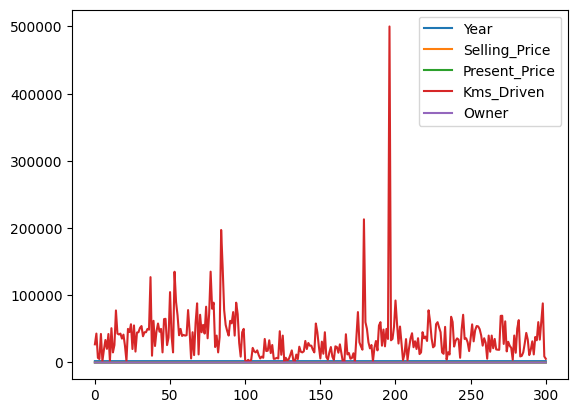

In [290]:
df.plot()

In [291]:
df.Fuel_Type.value_counts()



Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [292]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [293]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [294]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

In [295]:
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

In [296]:
df.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

In [297]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting into train and test data

In [298]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [299]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [300]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [301]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Split train and test data

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 2)

In [303]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
299,2017,12.50,9000,1,0,0,0
134,2017,0.81,11800,0,1,0,0
25,2011,4.99,20000,0,0,0,0
181,2016,0.48,50000,0,1,0,0
103,2017,1.60,1200,0,1,0,0
...,...,...,...,...,...,...,...
75,2015,6.80,36000,0,0,0,0
22,2011,8.01,50000,0,0,1,0
72,2013,18.61,56001,0,0,0,0
15,2016,10.79,43000,1,0,0,0


In [304]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
...,...,...,...,...,...,...,...
14,2009,7.210,77427,0,0,0,0
286,2016,7.900,28569,0,0,0,0
273,2010,7.500,61203,0,0,0,0
18,2015,5.090,35500,2,0,0,0


In [305]:
y_train

299    11.50
134     0.65
25      3.00
181     0.30
103     1.45
       ...  
75      3.95
22      4.40
72      7.45
15      7.75
168     0.42
Name: Selling_Price, Length: 201, dtype: float64

In [306]:
y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
       ...  
14      2.25
286     5.65
273     2.25
18      3.25
85      2.50
Name: Selling_Price, Length: 100, dtype: float64

Model Training

1. Linear Regression

In [307]:
reg = LinearRegression()

In [308]:
reg.fit(x_train,y_train)

LinearRegression()

Model Evaluation & Classification Metric

In [309]:
x_pred_train = reg.predict(x_train)

In [310]:
error = metrics.r2_score(y_train, x_pred_train)
print("Train r^2 Error: ", error)

Train r^2 Error:  0.9011804428538126


In [311]:
x_pred_test = reg.predict(x_test)

In [312]:
error_test = metrics.r2_score(y_test, x_pred_test)
print("Test r^2 Error: ", error_test)

Test r^2 Error:  0.7954751007064392


2. Lasso Regression

In [313]:
clf = Lasso()

In [314]:
clf.fit(x_train, y_train)

Lasso()

Model Evaluation & Classification Metric

In [315]:
x_pred_train2 = clf.predict(x_train)

In [316]:
lass_error_train = metrics.r2_score(y_train, x_pred_train2)
print("Train r^2 Error: ", lass_error_train)

Train r^2 Error:  0.8567897904494939


In [317]:
x_pred_test2 = clf.predict(x_test)

In [318]:
lass_error_test = metrics.r2_score(y_test, x_pred_test2)
print("Test r^2 Error: ", lass_error_test)

Test r^2 Error:  0.7940197883277862
